# ANALYZING NO-SHOW MEDICAL APPOINTMENTS

### This dataset is about whether or not patients would show up for medical appointments after receiving all instructions and the factors that affect it

### QUESTIONS TO BE ASKED
##### 1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
##### 2. Does a patient having a particular disease or habit affect whether they show up?
##### 3. Do males tend to miss apppointments and why is that?
##### 4. Does the interval between scheduling an appointment the appointment day itself influence the decision?
##### 5. Are the younger generation missing more appointments?
##### 6. Does reminding the patient via SMS increase the likelihood of them making it?
##### 7. Are some patients likely to make it to their appointment if the hospital is in a particular neighbourhood?
##### 8. Do patients who have enrolled in the Bolsa Família scholarship more likely to show up?

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [382]:
data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


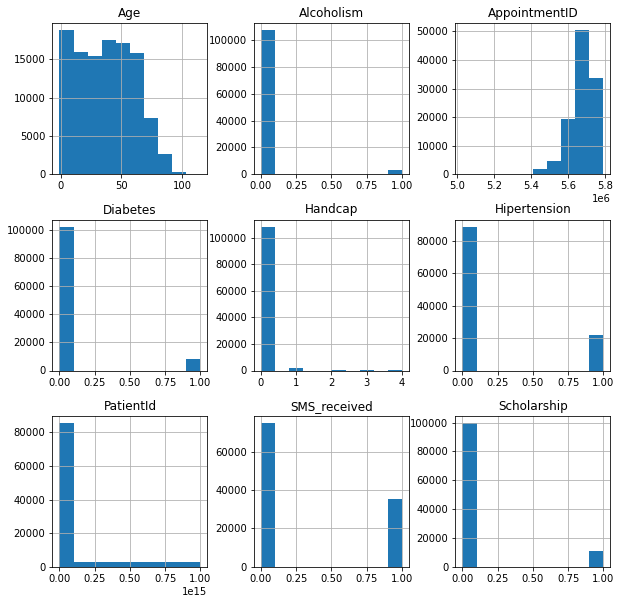

In [383]:
data.hist(figsize=(10,10));

In [384]:
#check if there are missing values
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [385]:
data=data.drop(columns=['PatientId','AppointmentID'])

In [386]:
#check for duplicate values
sum(data.duplicated())

635

In [387]:
data.nunique().count()

12

In [388]:
#check data types
data.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

###### Some of the columns have wrong data types especially the dates and needs to be addressed

In [389]:
#change to proper date
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])

In [390]:
#data types seem good now
data.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [391]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [392]:
#slightly change some of the column names
data=data.rename(columns={'No-show':'No_show','Hipertension':'Hypertension'})
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [393]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### looks like there are issues with the age column, some people are believed to be -1 years haha!, 115 years is possible though unlikely, needs more investigation

In [394]:
data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [395]:
#only use data from patients who have real ages, ie greater than 0
data=data[data['Age']>0]

In [396]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [397]:
#only used data from patients who are 100 and below, over 100 is possible but seems unlikely, so removed from analysis
data=data[data['Age']<=100]
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


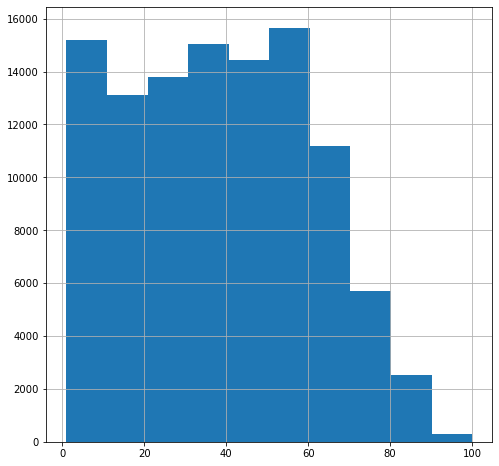

In [398]:
plt.figure(figsize=(8,8))
data['Age'].hist()

The distribution seems balanced with a very slight right skewness with most people between the ages of 0 and 60

In [399]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [400]:
data['No_show'].value_counts()

No     85303
Yes    21677
Name: No_show, dtype: int64

Many People showed up to their appointments, infact about 4 times people showed up than the ones that did not

F    70111
M    36869
Name: Gender, dtype: int64


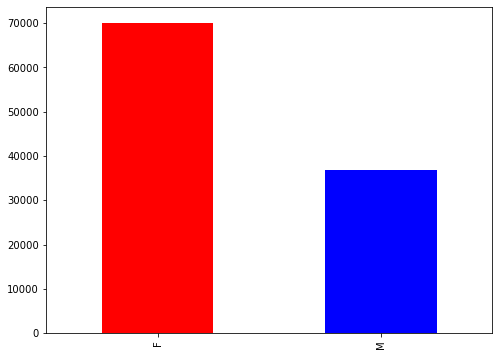

In [401]:
print(data['Gender'].value_counts())
colors=['red','blue']
data['Gender'].value_counts().plot(kind='bar', figsize=(8,6), color=colors)

There were more females than males, almost twice as much, maybe because males tend to keep things to themselves rather than seek medical help..lol

In [402]:
males=data[data['Gender']=='M']
males.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
13,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,No
16,M,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,0,0,0,0,0,0,No
22,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,Yes


In [403]:
males['No_show'].value_counts()/len(males)

No     0.799154
Yes    0.200846
Name: No_show, dtype: float64

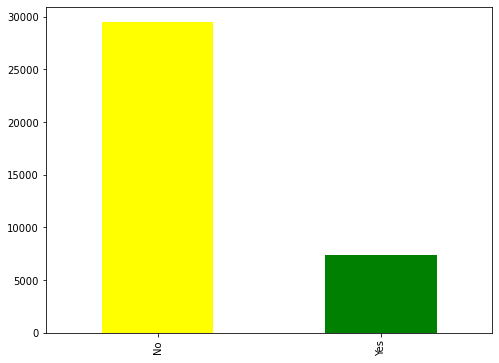

In [404]:
colors=['yellow','green']
males['No_show'].value_counts().plot(kind='bar', color=colors,figsize=(8,6))

Due to the unbalanced nature of the dataset, generally more people shows up hence more males showed up to their appointments

In [405]:
data.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No_show                        object
dtype: object

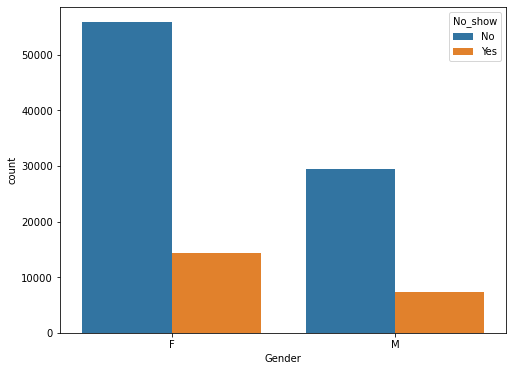

In [406]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Gender',hue='No_show')
plt.show()

In [407]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


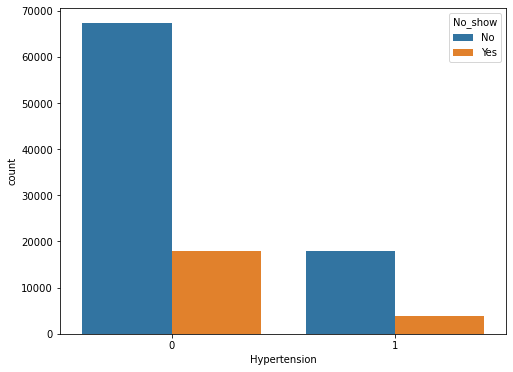

In [408]:
plt.figure(figsize=(8,6))
sns.countplot(x='Hypertension',data=data, hue='No_show')

Most patients did not have hypertension and the ones that had most turned up for their appointments

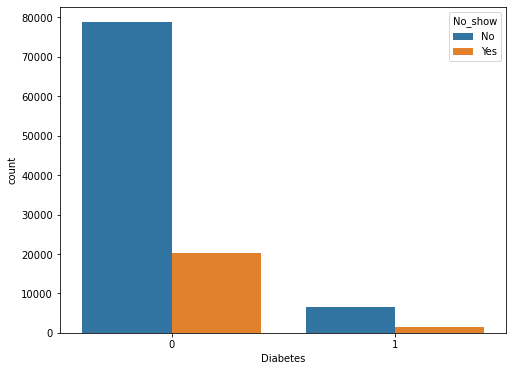

In [409]:
plt.figure(figsize=(8,6))
sns.countplot(x='Diabetes',data=data, hue='No_show')

Hmmm...here, a lot of patients did not have diabetes and since most people generally showed up, its difficult to tell 

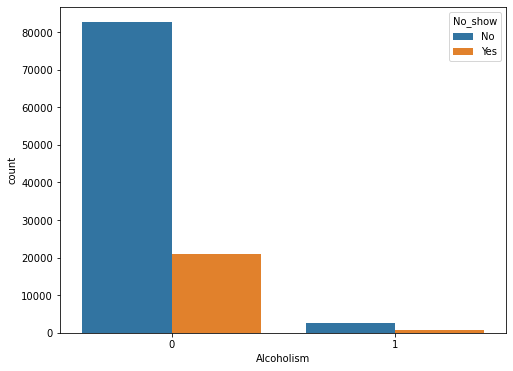

In [410]:
plt.figure(figsize=(8,6))
sns.countplot(x='Alcoholism',data=data, hue='No_show')

Difficult to tell anything significant

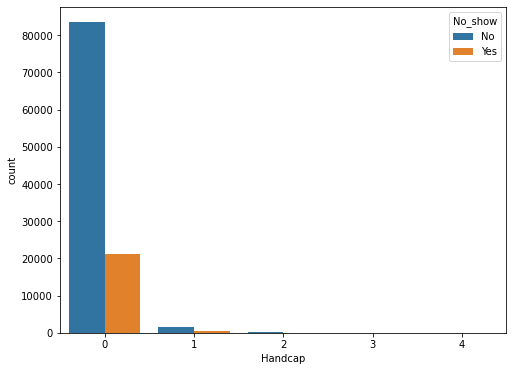

In [411]:
plt.figure(figsize=(8,6))
sns.countplot(x='Handcap',data=data, hue='No_show')

In [412]:
data['Age'].describe()

count    106980.000000
mean         38.311311
std          22.459144
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         100.000000
Name: Age, dtype: float64

In [413]:
#created a new column for age groups with younger generation btn ages 1-30, middle age 30-50 and above 50 the older gen
data['Age groups']=pd.cut(data['Age'],[1,30,50,100],labels=['Younger','Middle_Age','Older'])

In [414]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age groups
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Younger
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Older


Younger       39819
Older         35416
Middle_Age    29472
Name: Age groups, dtype: int64


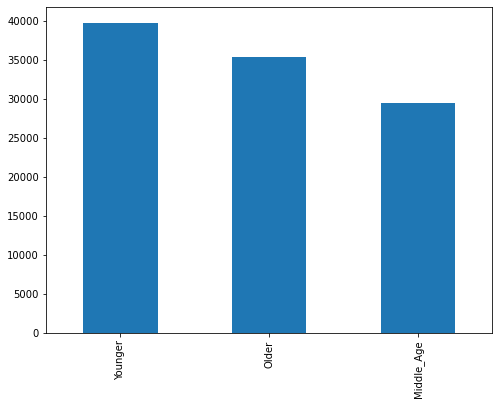

In [415]:
print(data['Age groups'].value_counts())
data['Age groups'].value_counts().plot(kind='bar', figsize=(8,6))

The yonger generation appeared more in this study followed by the older ones 

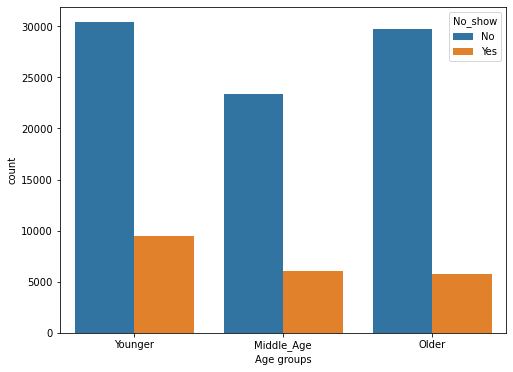

In [416]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Age groups', hue='No_show')

The younger generation tend to honour their appointments a lot, tho its difficult to tell due to the unbalance nature of the data

In [417]:
data['SMS_received'].value_counts()

0    72396
1    34584
Name: SMS_received, dtype: int64

0    72396
1    34584
Name: SMS_received, dtype: int64


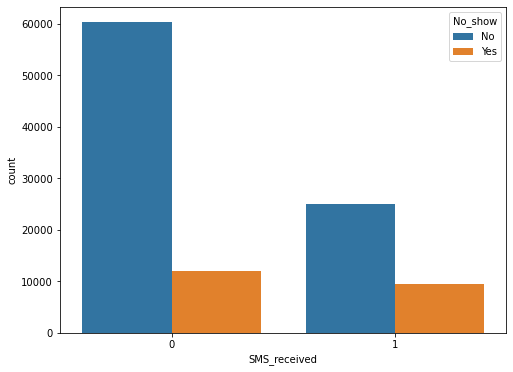

In [418]:
print(data['SMS_received'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='SMS_received', hue='No_show')

Few people recieved reminders through SMS and the few that did, most honoured it and made it to their appointment

In [419]:
data['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5562
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

The neighbourhood feature is too unique that its difficult to analyze, its best to ignore this feature

0    96171
1    10809
Name: Scholarship, dtype: int64


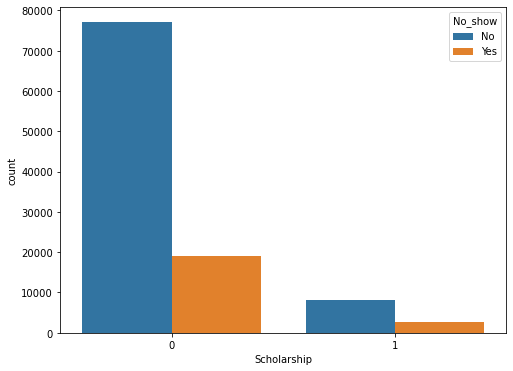

In [420]:
print(data['Scholarship'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Scholarship', hue='No_show')

Only a handful of people are on the Bolsa Família scholarship and most of the showed up to their appointment

In [421]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age groups
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Younger
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Older


In [422]:
data['Btn_Schedule_and_Appoint_day']=data['AppointmentDay']-data['ScheduledDay']


In [423]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age groups,Btn_Schedule_and_Appoint_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Younger,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Older,-1 days +07:52:37


The average time that individuals set appointment time is 9 days after schedling, the minimum time is -7 days which shows there is some error somewhere

In [424]:
data

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age groups,Btn_Schedule_and_Appoint_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Older,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Older,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Older,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Younger,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Older,-1 days +07:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Older,34 days 14:44:25
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Older,34 days 16:32:27
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Younger,40 days 07:56:08
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Middle_Age,40 days 08:50:37


In [425]:
data['No_show']=data['No_show'].astype(object)

In [426]:
data['No_show'][data['No_show']=='No']=1
data['No_show'][data['No_show']=='Yes']=0

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [427]:
data['No_show'].value_counts()

1    85303
0    21677
Name: No_show, dtype: int64

In [428]:
data['No_show']=data['No_show'].astype(int)

In [429]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age groups,Btn_Schedule_and_Appoint_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Older,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Older,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Older,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Younger,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Older,-1 days +07:52:37


In [430]:
data['Hypertension'].value_counts()/len(data['Hypertension'])

0    0.796224
1    0.203776
Name: Hypertension, dtype: float64

In [431]:
data['Diabetes'].value_counts()/len(data['Diabetes'])

0    0.925752
1    0.074248
Name: Diabetes, dtype: float64

In [432]:
data['Alcoholism'].value_counts()/len(data['Alcoholism'])

0    0.968592
1    0.031408
Name: Alcoholism, dtype: float64

In [433]:
data['Handcap'].value_counts()/len(data['Handcap'])

0    0.979099
1    0.019041
2    0.001711
3    0.000122
4    0.000028
Name: Handcap, dtype: float64

Regarding the health issues and alcoholism, its always unbalanced being that more people dont have a particular diseases or disorder
than the ones that have, always showing an unbalanced nature, 79% of people didnt have high blood pressure, whiles the other groups 90% did not have any issue

In [434]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age groups,Btn_Schedule_and_Appoint_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Older,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Older,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Older,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Younger,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Older,-1 days +07:52:37


In [435]:
data.groupby(['Gender','Age groups'])['Hypertension','Diabetes'].mean()

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Hypertension  Diabetes
Gender Age groups                        
F      Younger         0.009771  0.005333
       Middle_Age      0.160590  0.046379
       Older           0.492187  0.188591
M      Younger         0.008127  0.002360
       Middle_Age      0.145616  0.044950
       Older           0.440221  0.165981

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


                   Hypertension  Diabetes
Gender Age groups                        
F      Younger         0.009771  0.005333
       Middle_Age      0.160590  0.046379
       Older           0.492187  0.188591
M      Younger         0.008127  0.002360
       Middle_Age      0.145616  0.044950
       Older           0.440221  0.165981


Text(0.5, 1.0, 'Average Distribution of Gender in terms of Hypertension and Diabetes')

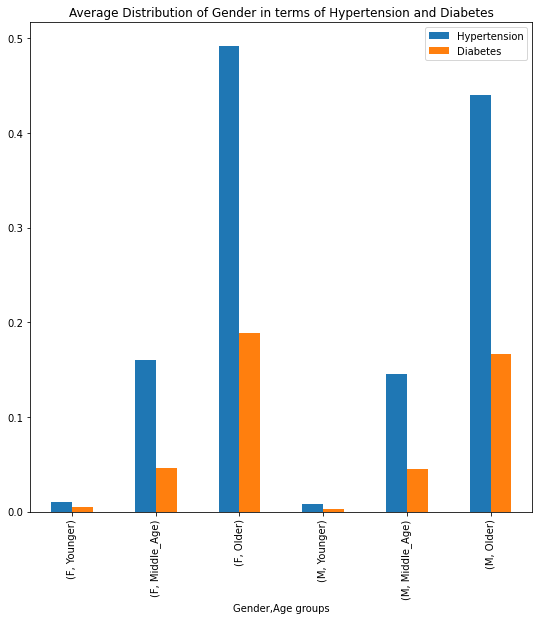

In [436]:
print(data.groupby(['Gender','Age groups'])['Hypertension','Diabetes'].mean())
ax=data.groupby(['Gender','Age groups'])['Hypertension','Diabetes'].mean().plot(kind='bar',figsize=(9,9))
ax.set_title('Average Distribution of Gender in terms of Hypertension and Diabetes')

The younger generation of both genders have the least number of diabetes and hypertension cases with the older generation having the most which makes sense since older people are more likely to have illness and diseases

In [437]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age groups,Btn_Schedule_and_Appoint_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Older,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Older,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Older,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Younger,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Older,-1 days +07:52:37


Age groups  Gender
Younger     F         0.341666
            M         0.289965
Middle_Age  F         0.349330
            M         0.292231
Older       F         0.331222
            M         0.304108
Name: SMS_received, dtype: float64


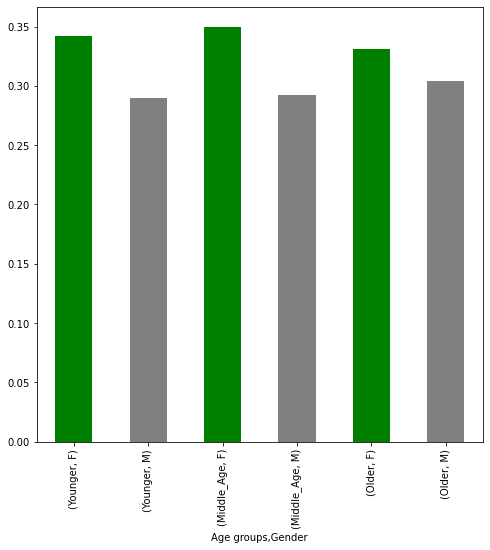

In [438]:
print(data.groupby(['Age groups','Gender'])['SMS_received'].mean())
colors=['green','gray']
data.groupby(['Age groups','Gender'])['SMS_received'].mean().plot(kind='bar',figsize=(8,8),color=colors)

For the male population, the older generation had more SMS messages sent to them as a reminder for their appointments than the rest since they tend to have certain illness and diseases but for the females,the middle age group had more reminders and even the younder generation had more reminders than the older ones, which is suprising, given that the older population tend to have more illnesses and problems

         Hypertension  Diabetes
No_show                        
0            0.174009  0.065969
1            0.211341  0.076351


C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


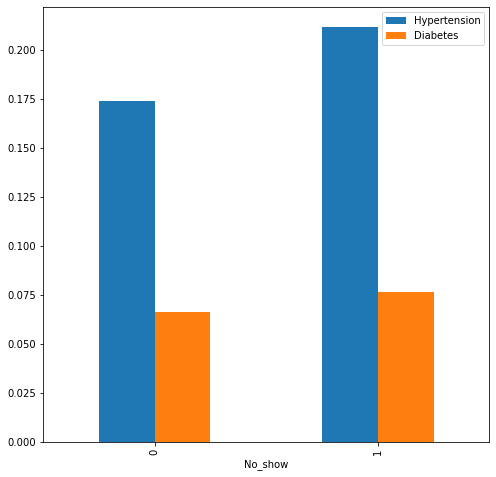

In [439]:
print(data.groupby(['No_show'])['Hypertension','Diabetes'].mean())
data.groupby(['No_show'])['Hypertension','Diabetes'].mean().plot(kind='bar',figsize=(8,8))

For the people that had hypertension, a large number of them did show up for their appointments and the people that had diabetes, many of them did also show up, which shows that people with certain diseases tend to honour their appointments

Age groups
Younger       0.128733
Middle_Age    0.139590
Older         0.041987
Name: Scholarship, dtype: float64


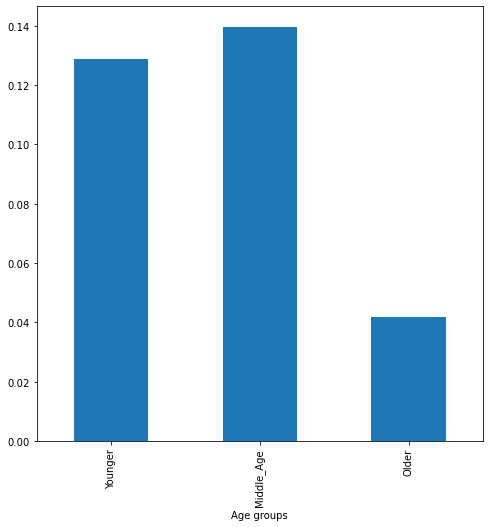

In [440]:
print(data.groupby('Age groups')['Scholarship'].mean())
data.groupby('Age groups')['Scholarship'].mean().plot(kind='bar',figsize=(8,8))

The middle age group tend to be on the Scholarship a lot maybe due to the fact that they have to take care of the othr 2 age groups, either they have kids or have to take care of their parents or both.

In [441]:
data.corr()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
Age,1.000000,-0.112668,0.502307,0.290793,0.090461,0.073400,0.005332,0.067183
Scholarship,-0.112668,1.000000,-0.024534,-0.027629,0.033523,-0.009824,-0.000019,-0.029384
Hypertension,0.502307,-0.024534,1.000000,0.430836,0.085459,0.078377,-0.008851,0.037253
Diabetes,0.290793,-0.027629,0.430836,1.000000,0.016870,0.056477,-0.016143,0.015919
Alcoholism,0.090461,0.033523,0.085459,0.016870,1.000000,0.003897,-0.027409,0.000510
Handcap,0.073400,-0.009824,0.078377,0.056477,0.003897,1.000000,-0.025018,0.006699
SMS_received,0.005332,-0.000019,-0.008851,-0.016143,-0.027409,-0.025018,1.000000,-0.127300
No_show,0.067183,-0.029384,0.037253,0.015919,0.000510,0.006699,-0.127300,1.000000


##### 1.None of the other columns seem to have any decent correlation with the No_show, SMS received had the highest correlation among the rest
##### 2.Age seems to be fairly correlated with hypertension and Diabetes, the older you are the more likely you have them
##### 3.Hypertension and Diabetes have a fair amount of correlation


###  Problem with the data was that it was unbalanced, about 4 times people had made it to their appointment than ones that didnt, making it difficult to draw useful conclusions since it would be always biased towards one side